In [1]:
from function.function import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from pandas.core import datetools

import warnings

warnings.filterwarnings('ignore')
get_ipython().magic('matplotlib inline')

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 1.EDA

### 1-1 데이터 소개

In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [3]:
print("Train data : ", train.shape)
print("Test  data : ", test.shape)

Train data :  (1460, 81)
Test  data :  (1459, 80)


In [4]:
train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
1455         Lvl    AllPub    ...            0    NaN    NaN         NaN   
1456         Lvl    AllPub    ...            0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    ...            0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    ...            0    NaN    NaN         NaN   
1459         Lvl    AllPub    ...            0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [ ]:
test.tail()

In [ ]:
train.describe()

Find : 1. LotFrontage, MasVnrArea 등 일부 데이터가 missing되었음

### 1-2 타겟 데이터 (SalePrice)

In [ ]:
train["SalePrice"].describe()

In [ ]:
plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(train["SalePrice"])

plt.subplot(132)
stats.probplot(train["SalePrice"], plot=plt)

plt.subplot(133)
sns.boxplot(train["SalePrice"])
plt.tight_layout()
plt.show()

### 1-3  Analysis the univariance

In [ ]:
# train = train.iloc[:,1:] #Id열 제거
train["MSSubClass"] = train["MSSubClass"].astype('str')   

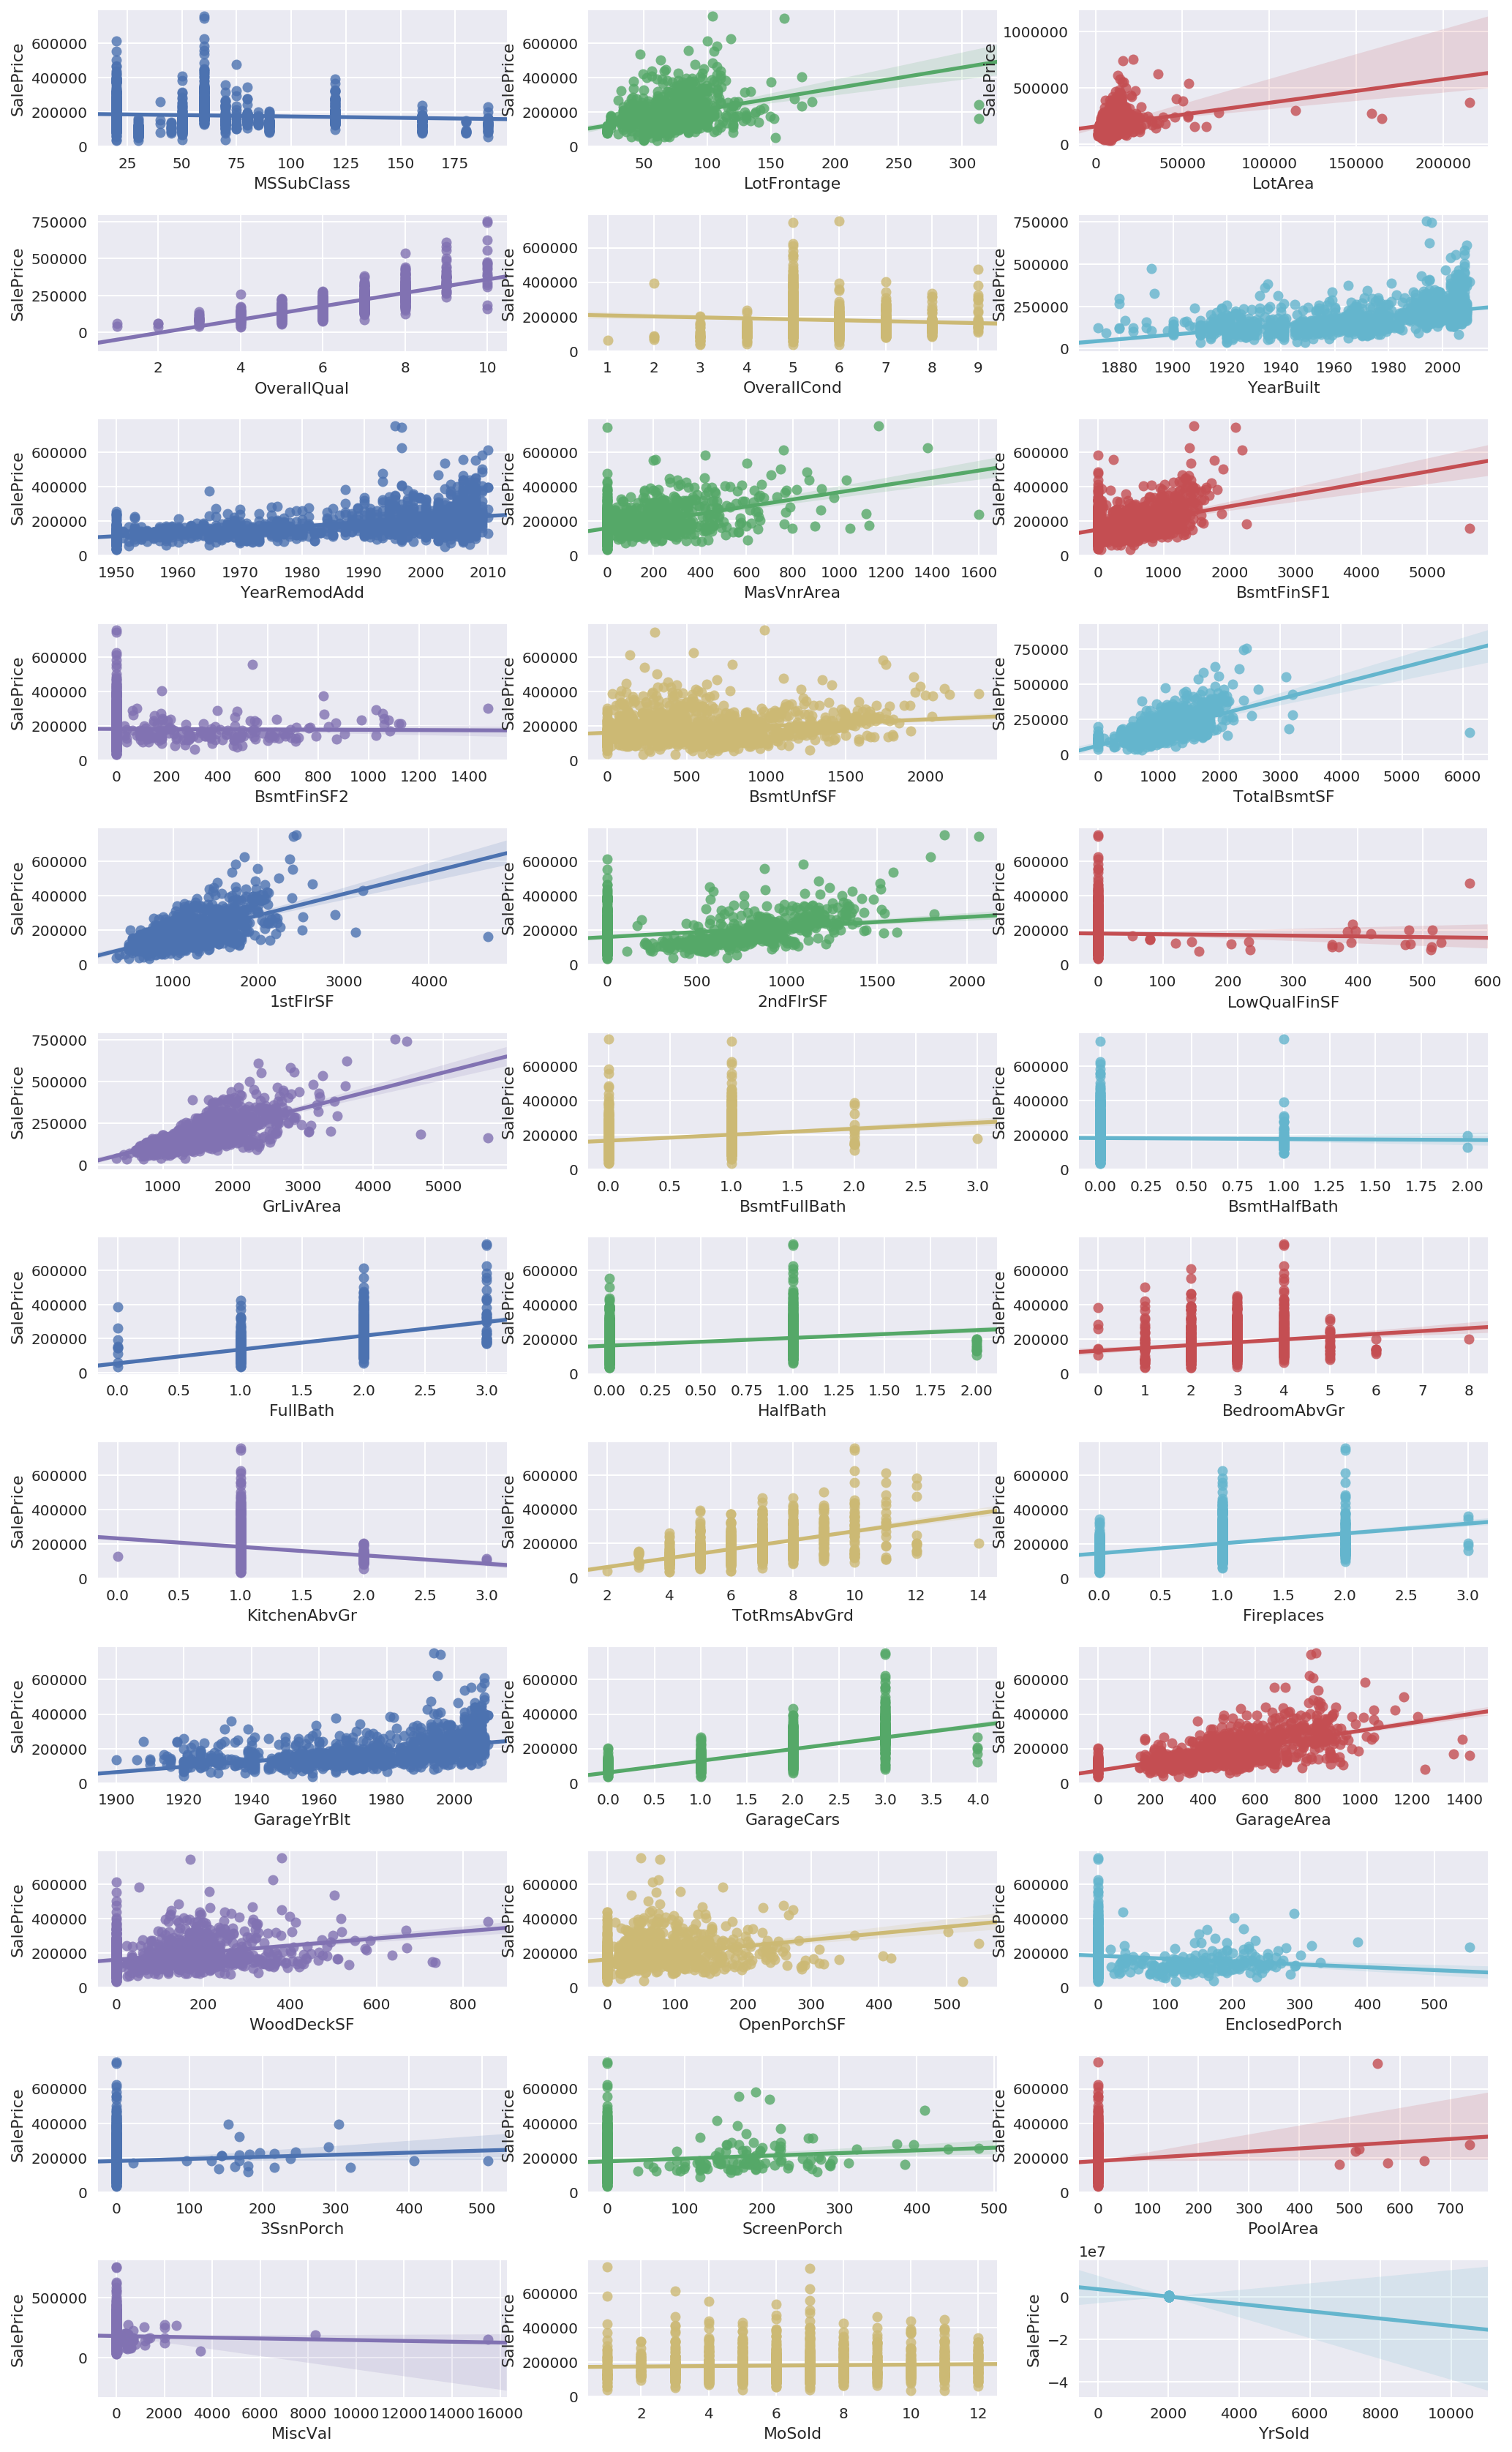

In [7]:
train_num = train.select_dtypes(include=[np.number])
train_num = train_num.drop(['Id'], axis=1)

fig, axs = plt.subplots(12,3, figsize=(16, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2, right=0.95)

axs = axs.ravel()

for ind, feat in enumerate(train_num.columns):
    if feat != 'SalePrice':
        sns.regplot(train_num[feat], train_num['SalePrice'], ax = axs[ind])
    
plt.show()


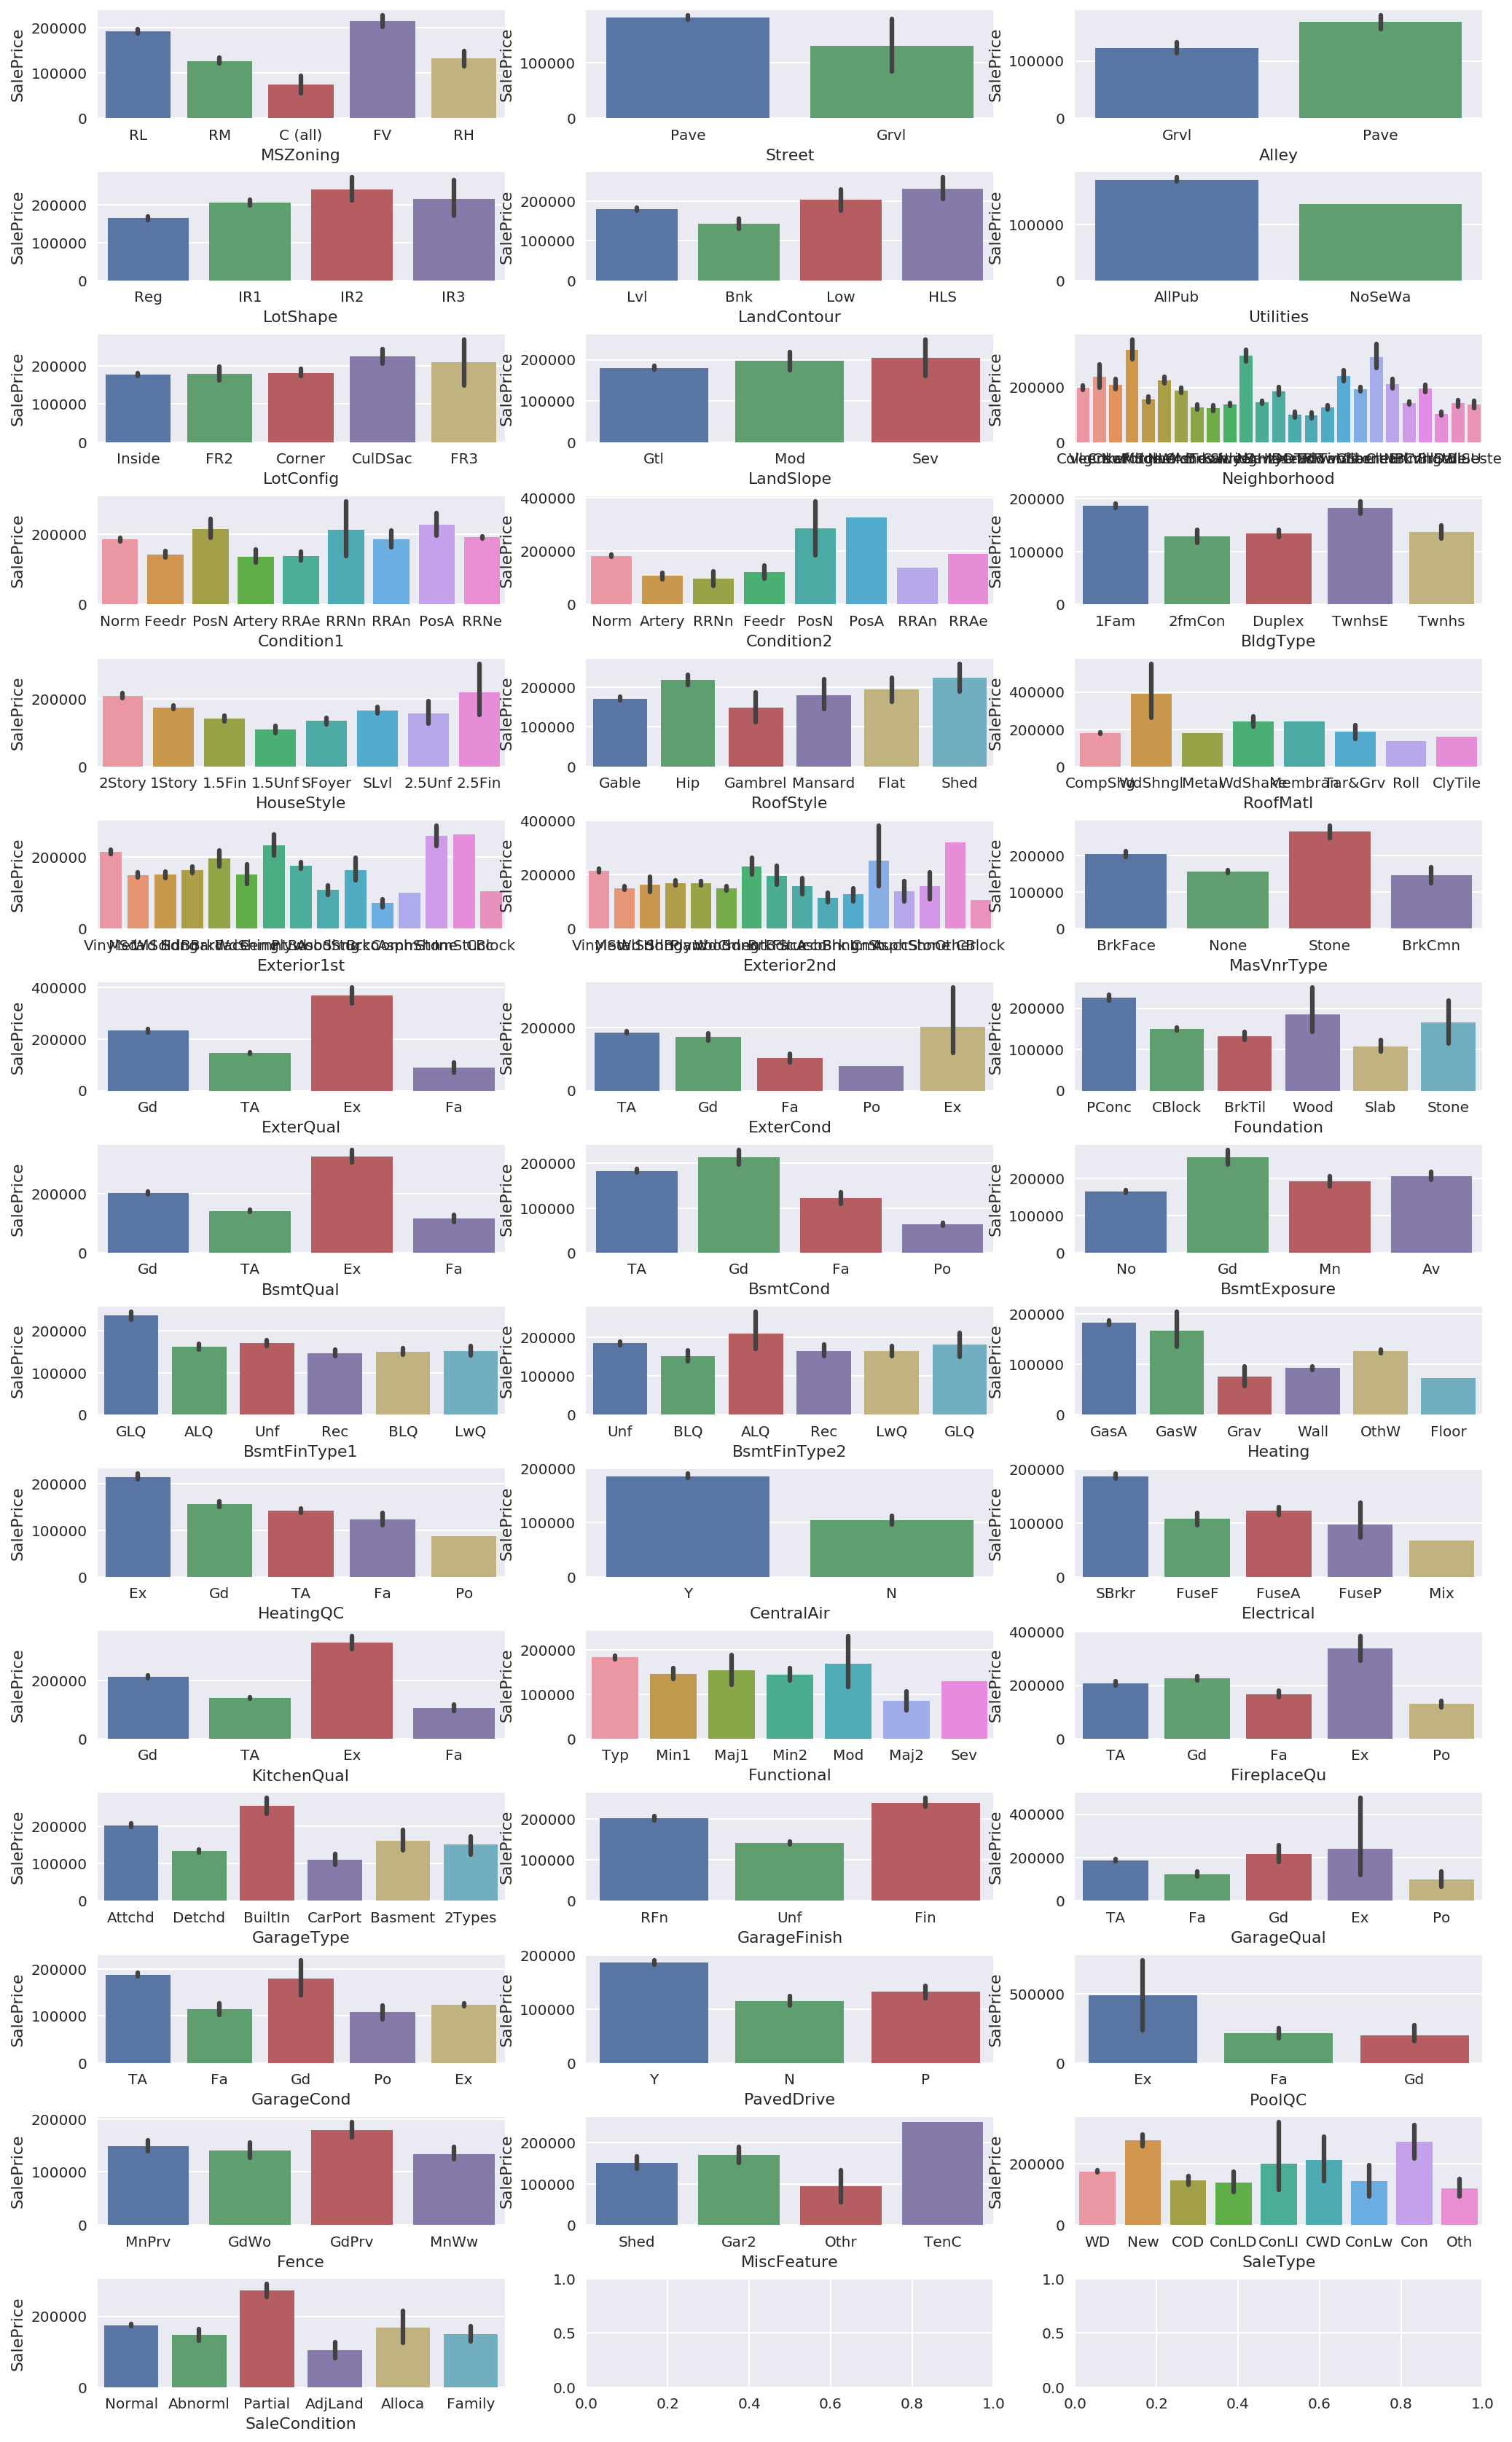

In [8]:
train_cat = train.select_dtypes(exclude=[np.number])
train_cat['SalePrice'] = train['SalePrice']

fig, axs = plt.subplots(15,3, figsize=(16, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2, right=0.95)

axs = axs.ravel()

for ind, feat in enumerate(train_cat.columns):
    if feat != 'SalePrice':
        sns.barplot(train_cat[feat], train_cat['SalePrice'], ax = axs[ind])

plt.show()

In [6]:
# Categoric and Numerical 변수 분리
numerical_features = []
categorical_features = []
for f in train.columns:
    if train.dtypes[f] != 'object':
        numerical_features.append(f)
    else:
        categorical_features.append(f)

In [ ]:
print("Numerical Features Qty :", len(numerical_features),"\n")
print("Numerical Features : ", numerical_features, "\n\n")
print("Categorical Features Qty :", len(categorical_features),"\n")
print("Categorical Features :", categorical_features)

#### Numerical Features with SalePrice

In [ ]:
fig, ax = plt.subplots(20,2, figsize = (10,95))

for idx, n in enumerate(numerical_features):
    
    if idx % 2 == 0 :
        sns.regplot(x=n, y="SalePrice",data=train, ax = ax[idx//2,0])
    
        
    else:
        sns.regplot(x=n, y="SalePrice",data=train, ax = ax[idx//2,1])

In [ ]:
fig, ax = plt.subplots(22,2, figsize = (10,95))

for idx, n in enumerate(categorical_features):
    
    if idx % 2 == 0 :
        sns.countplot(x=n,data=train, ax = ax[idx//2,0])
  
    else:
        sns.countplot(x=n,data=train, ax = ax[idx//2,1])

## 2. Feature Engineering

### 2-1 SalePrice와 변수들 간의 관계

#### 2-1-1 GrLivArea  &  2ndFloor & Basement

In [ ]:
grid = sns.jointplot(x = "GrLivArea", y = "SalePrice", data=train, kind="reg")
grid.fig.set_size_inches(15,5)

df_train = train.copy()
df_train["2ndFloor"] = "2ndFloor"
df_train["2ndFloor"].loc[df_train["2ndFlrSF"]==0] = "No 2ndFloor"
df_train["Basement"] = "Basement"
df_train["Basement"].loc[df_train["TotalBsmtSF"]==0] = "No Basement"

plt.figure(figsize = (15,6))

plt.subplot(121)
g = sns.stripplot( x = "GrLivArea", y = 'SalePrice', hue = "2ndFloor", data = df_train, alpha = 0.7)
g.set_xlabel('GrLivArea')
g.set_ylabel('SalePrice')
g.set_ylim(0,400000)
g.set_title('GrLiv & 2ndFloor - SalePrice')

plt.subplot(122)
b = sns.stripplot( x = "GrLivArea", y = 'SalePrice', hue = "Basement", data = df_train, alpha = 0.7)
b.set_xlabel('GrLivArea')
b.set_ylabel('SalePrice')
g.set_ylim(0,400000)
g.set_title('GrLivArea & Basement - SalePrice')

plt.show()

In [ ]:
GrLivArea_outlier = detect_outliers(train, "GrLivArea")
GrLivArea_outlier

Find : 1. Grliv 넓이가 중간 아래부분까지는 같은 넓이의 집은 2층보다 1층집의 값 더 비싼것을 알수 있었다
       2. 베이스먼트가 없는집은 거의 없으며, 집값에는 영향이 없는것 같다 

#### 2-1-2 OverallQual & OverallCond

In [ ]:
plt.figure(figsize=(15,8))

ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
for qual in range(1,10+1):
    index = train.OverallQual == qual
    ax1.scatter(train.GrLivArea.loc[index], train.SalePrice.loc[index], data=train, label= qual, alpha =0.5)
ax1.legend(loc = 0)
ax1.set_title("GrLivArea & OverallQual - SalePrice")

ax2 = plt.subplot2grid((2,2), (1,0))
sns.boxplot(x = "OverallQual", y = "SalePrice", data=train, ax= ax2)
ax2.set_title('OverallQual - SalePrice')

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = "OverallCond", y = "SalePrice", data=train, ax= ax3)
ax3.set_title('OverallCond - SalePrice')

In [ ]:
OverallQual_outlier = detect_outliers(train, "OverallQual")
OverallQual_outlier

Find : 1. 품질과 집값은 선형관계를 발견할 수 있으나 overall condition과 집값은 관계가 없는것을 발견할 수 있었음

#### 2-1-2 GarageArea & GarageCars

'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond'


In [ ]:
plt.figure(figsize=(15,6))

ax1 = plt.subplot(1,2,1)
for car in range(0,5):
    index = train.GarageCars == car
    ax1.scatter(x = train.GarageArea.loc[index], y = train.SalePrice.loc[index], data=train, label=car, alpha='0.5')

ax1.legend()
ax1.set_title('GarageArea - SalePrice')

ax2 = plt.subplot(1,2,2)
sns.stripplot(x = "GarageCars", y = "SalePrice", data=train,ax=ax2, jitter=True)
ax2.set_title('GarageCars - SalePrice')
ax2.legend()

plt.show()

In [ ]:
GarageCars_outlier = detect_outliers(train, "GarageArea")
GarageCars_outlier

#### 2-1-3 Neighborhood

In [ ]:
Neighbor = train.pivot_table(index="Neighborhood",values="SalePrice", aggfunc='mean').sort_values(by = ["SalePrice"], ascending = False)
Neighbor = Neighbor.reset_index()

In [ ]:
g = sns.factorplot(x = "Neighborhood", y="SalePrice", data=Neighbor, size =8, kind="bar")
g.set_xticklabels(rotation=45)
g.fig.set_size_inches(15,5)
plt.show()

In [ ]:
Neighbor_list=list(set(Neighbor["Neighborhood"]))

In [ ]:
High_price_neighbor = ['NoRidge','NridgHt','StoneBr']
Middle_price_neighbor = ['Timber','Somerst','Veenker','ClearCr','Crawfor','NWAmes', 'Gilbert','Blmngtn', 'SWISU','Mitchel','CollgCr']
Low_price_neighbor = ['IDOTRR','Blueste', 'Sawyer','NAmes', 'BrDale', 'OldTown','MeadowV', 'NPkVill','BrkSide','Edwards']

In [ ]:
# def Gp_Neighbor(saleprice):
#     if saleprice > 250000:
#         return "first_group"
#     elif saleprice > 200000:
#         return "second_group"
#     elif saleprice > 150000:
#         return "third_group"
#     else: 
#         return "fourth_group"

In [ ]:
# for n in Neighbor_list:
#     if n in High_price_neighbor:
#         High_price.append(n)
#     train[train["Neighborhood"] == n

# High_price_neighbor = train[train["Neighborhood"] == 'NoRidge','NridgHt','StoneBr'

In [ ]:
# df_train = train.copy()
# df_train["Gp_Neighborhood"] = train["SalePrice"].apply(Gp_Neighborhood)
# g = sns.factorplot(x="Gp_Neighborhood", y="SalePrice", data=train, kind="bar")
# g.fig.set_size_inches(15,5)
# plt.show()

#### 2-1-4 YearBuilt

'YearBuilt', 'YearRemodAdd',

In [ ]:
plt.figure(figsize=(15,6))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15,6))
ax2 = plt.subplot(1,2,1)
ax2.scatter(x = train['YearBuilt'], y = train['YearRemodAdd'], alpha = 0.5)
ax3 = plt.subplot(1,2,2)
ax3.scatter(x = train['YearBuilt'], y = train['YrSold'], alpha = 0.5)
plt.show()

plt.figure(figsize=(15,6))
ax4 = plt.subplot2grid((2,2), (0,0), colspan = 2)
ax4.scatter(x = train['YearBuilt'], y = train['OverallQual'], alpha = 0.5)
ax5 = plt.subplot2grid((2,2), (1,0), colspan = 2)
sns.countplot(x = "MoSold", data=train, ax = ax5)
plt.show()

Find

1.

#### 2-1-5 Fireplaces & FireplaceQu

In [ ]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
sns.stripplot(x = train['Fireplaces'], y = train['SalePrice'], alpha = 0.5, jitter = True, ax=ax1)

ax2 = plt.subplot2grid((2,2), (1,0))
sns.countplot(x = "FireplaceQu", data=train, ax = ax2, order = train["FireplaceQu"].value_counts().index)

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = 'FireplaceQu', y = 'OverallQual', data = train, ax=ax3)
plt.show()

plt.figure(figsize=(15,10))
ax4 = plt.subplot(2,1,1)
sns.stripplot(x='FireplaceQu', y='SalePrice', hue='Fireplaces', data=train, jitter=True, alpha=0.6, ax=ax4)

ax5 = plt.subplot(2,1,2)
ax5.scatter(x = train['Fireplaces'], y = train['GrLivArea'], alpha = 0.5)
plt.show()


Find

1.

In [ ]:
g = sns.FacetGrid(df, col = 'YrSold', col_wrap = 3)
g.map(sns.boxplot, 'MoSold', 'SalePrice', palette='Set2', order = range(1, 13))\
.set(ylim = (0, 500000))
plt.tight_layout()

#### 2-1-6 BsmtBath

BsmtFullBath : 지하실 가득한 욕실  
BsmtHalfBath : 지하 욕실 반 화장실

'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',

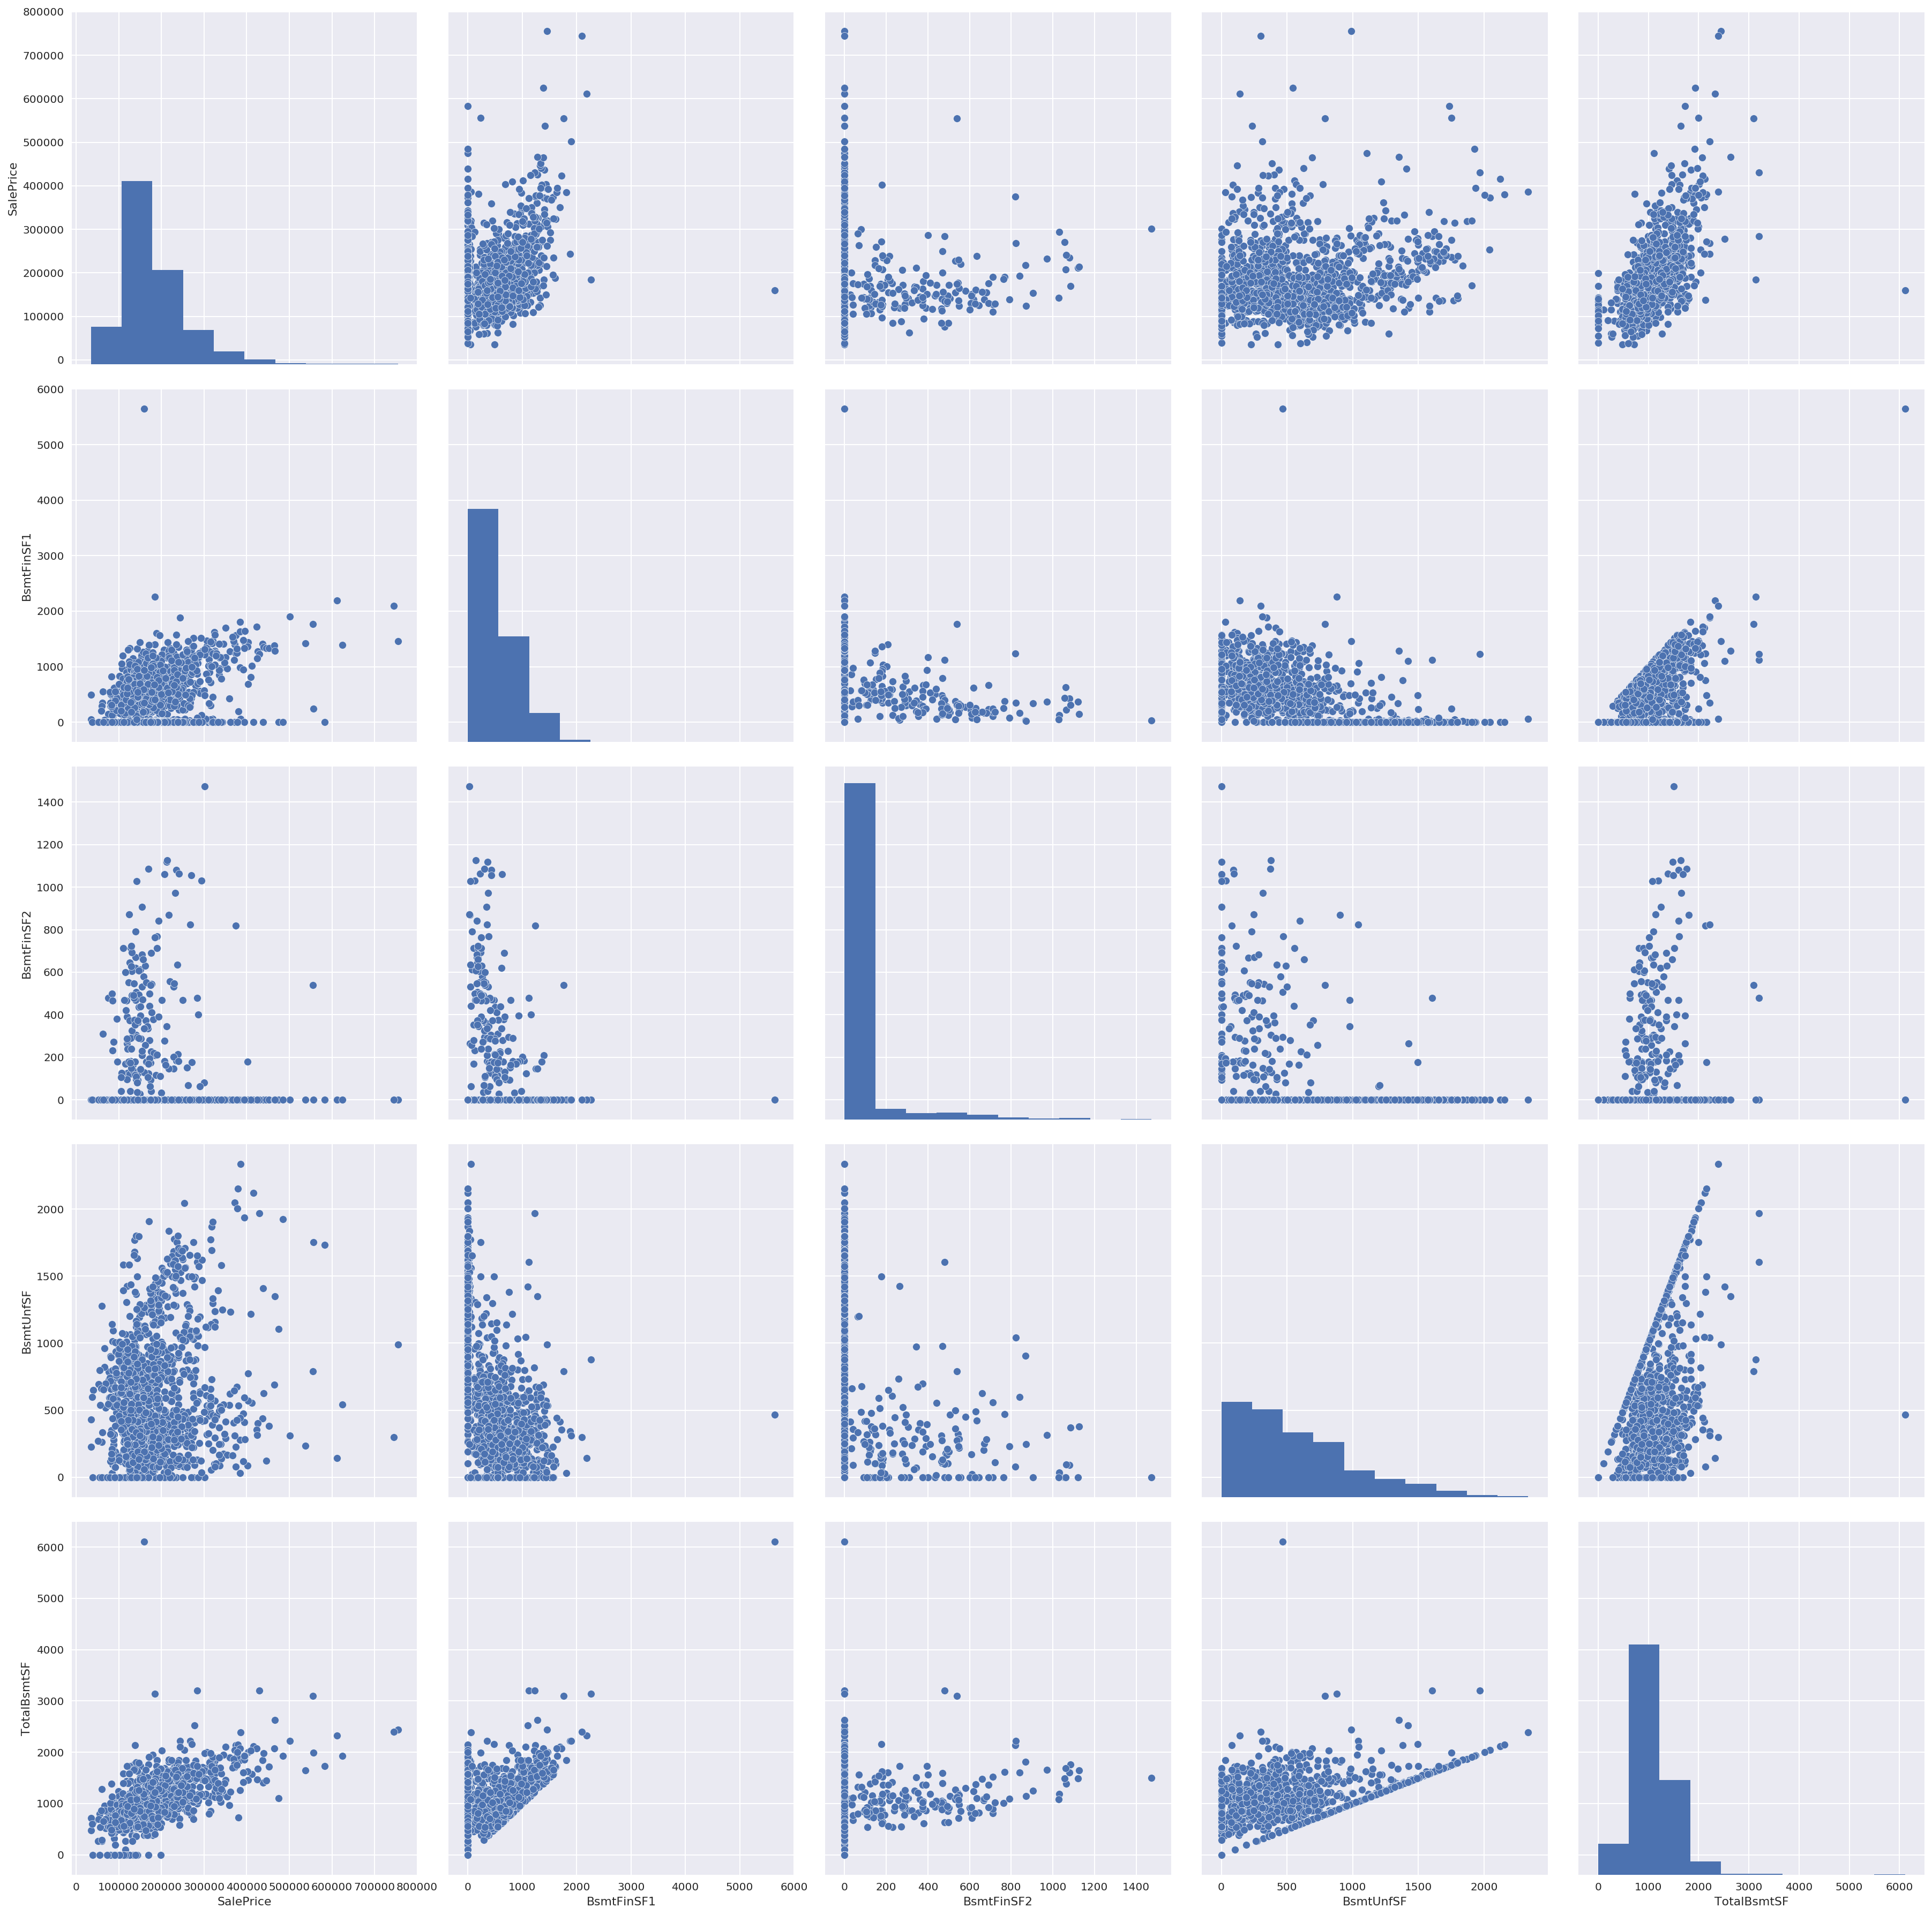

In [96]:
sns.set()
cols = ['SalePrice', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ]
sns.pairplot(train[cols], size = 5)
plt.show();

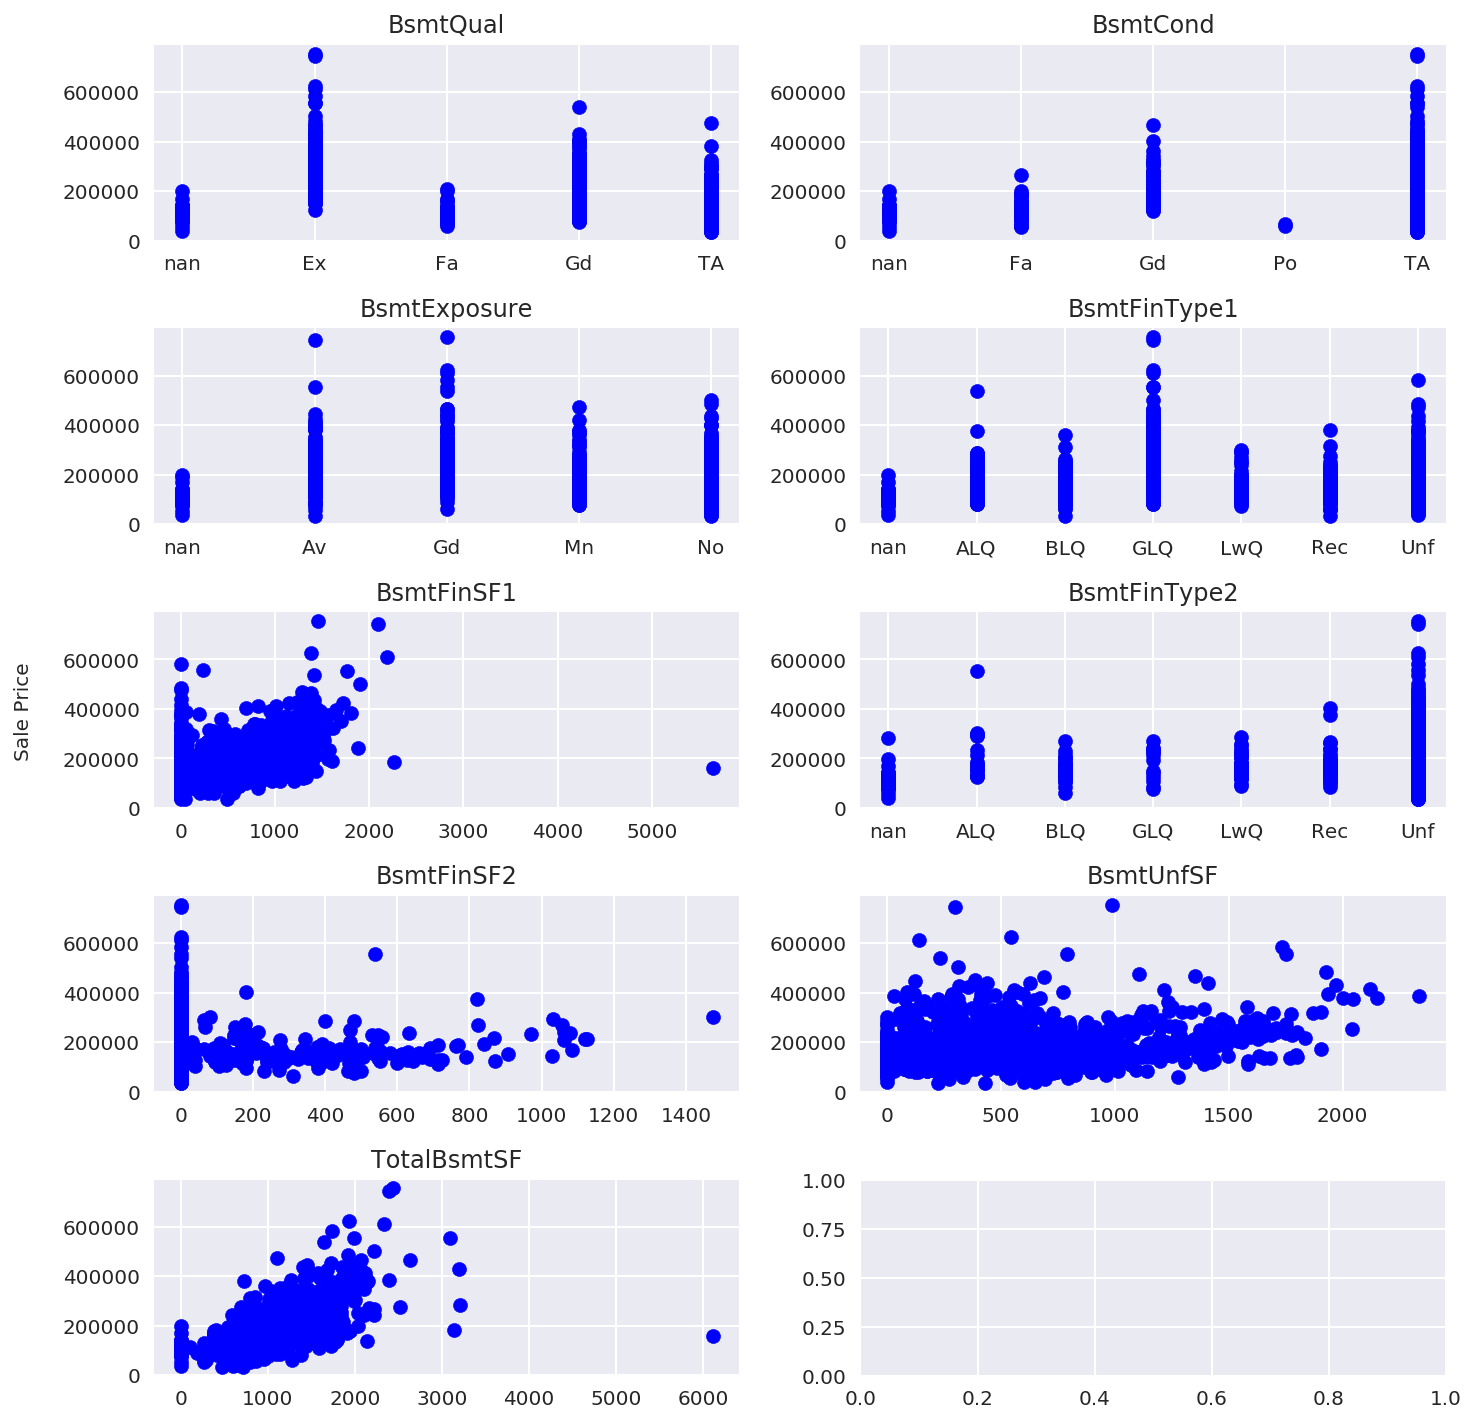

In [22]:
plt.figure(1)
fig, arr = plt.subplots(5, 2, figsize=(10, 10))
SP = train.SalePrice.values
s_color = 'blue'
arr[0, 0].scatter(train.BsmtQual.values, SP, color=s_color)
arr[0, 0].set_title('BsmtQual')
arr[0, 1].scatter(train.BsmtCond.values, SP, color=s_color)
arr[0, 1].set_title('BsmtCond')
arr[1, 0].scatter(train.BsmtExposure.values, SP, color=s_color)
arr[1, 0].set_title('BsmtExposure')
arr[1, 1].scatter(train.BsmtFinType1.values, SP, color=s_color)
arr[1, 1].set_title('BsmtFinType1')
arr[2, 0].scatter(train.BsmtFinSF1.values, SP, color=s_color)
arr[2, 0].set_title('BsmtFinSF1')
arr[2, 1].scatter(train.BsmtFinType2.values, SP, color=s_color)
arr[2, 1].set_title('BsmtFinType2')
arr[3, 0].scatter(train.BsmtFinSF2.values, SP, color=s_color)
arr[3, 0].set_title('BsmtFinSF2')
arr[3, 1].scatter(train.BsmtUnfSF.values, SP, color=s_color)
arr[3, 1].set_title('BsmtUnfSF')
arr[4, 0].scatter(train.TotalBsmtSF.values, SP, color=s_color)
arr[4, 0].set_title('TotalBsmtSF')

fig.text(-0.02, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 10)
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.boxplot('BsmtCond', 'SalePrice', data = train, ax = ax[0, 0])
sns.boxplot('BsmtQual', 'SalePrice', data = train, ax = ax[0, 1])
sns.boxplot('BsmtExposure', 'SalePrice', data = train, ax = ax[1, 0])
sns.boxplot('BsmtFinType1', 'SalePrice', data = train, ax = ax[1, 1])

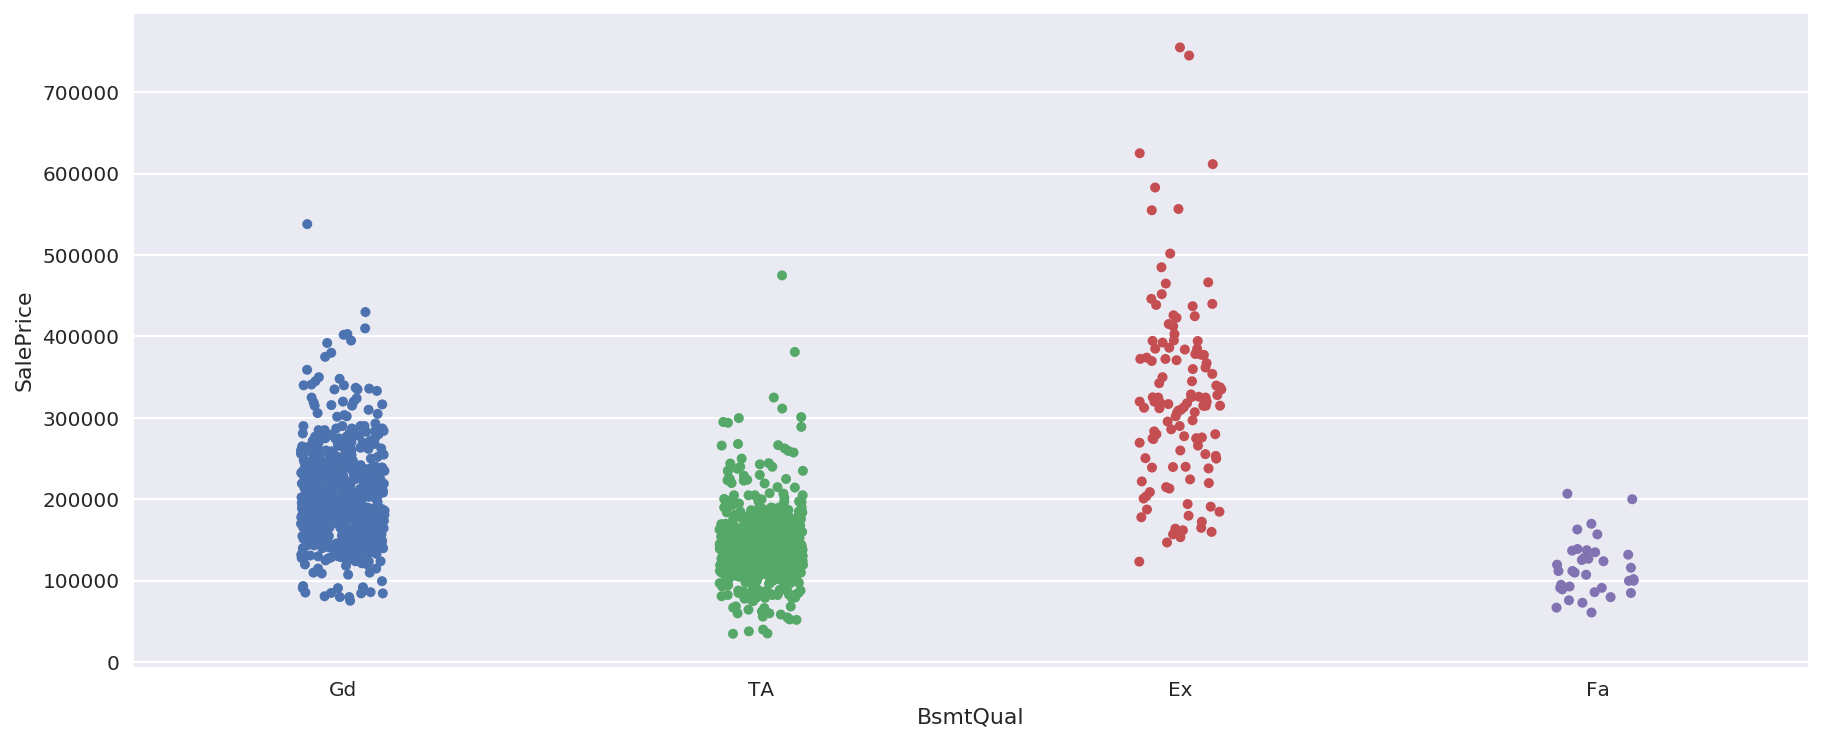

In [4]:
plt.figure(figsize=(15,6))
sns.stripplot(x = "BsmtQual", y = "SalePrice", data=train, jitter=True)
plt.show()

No handles with labels found to put in legend.


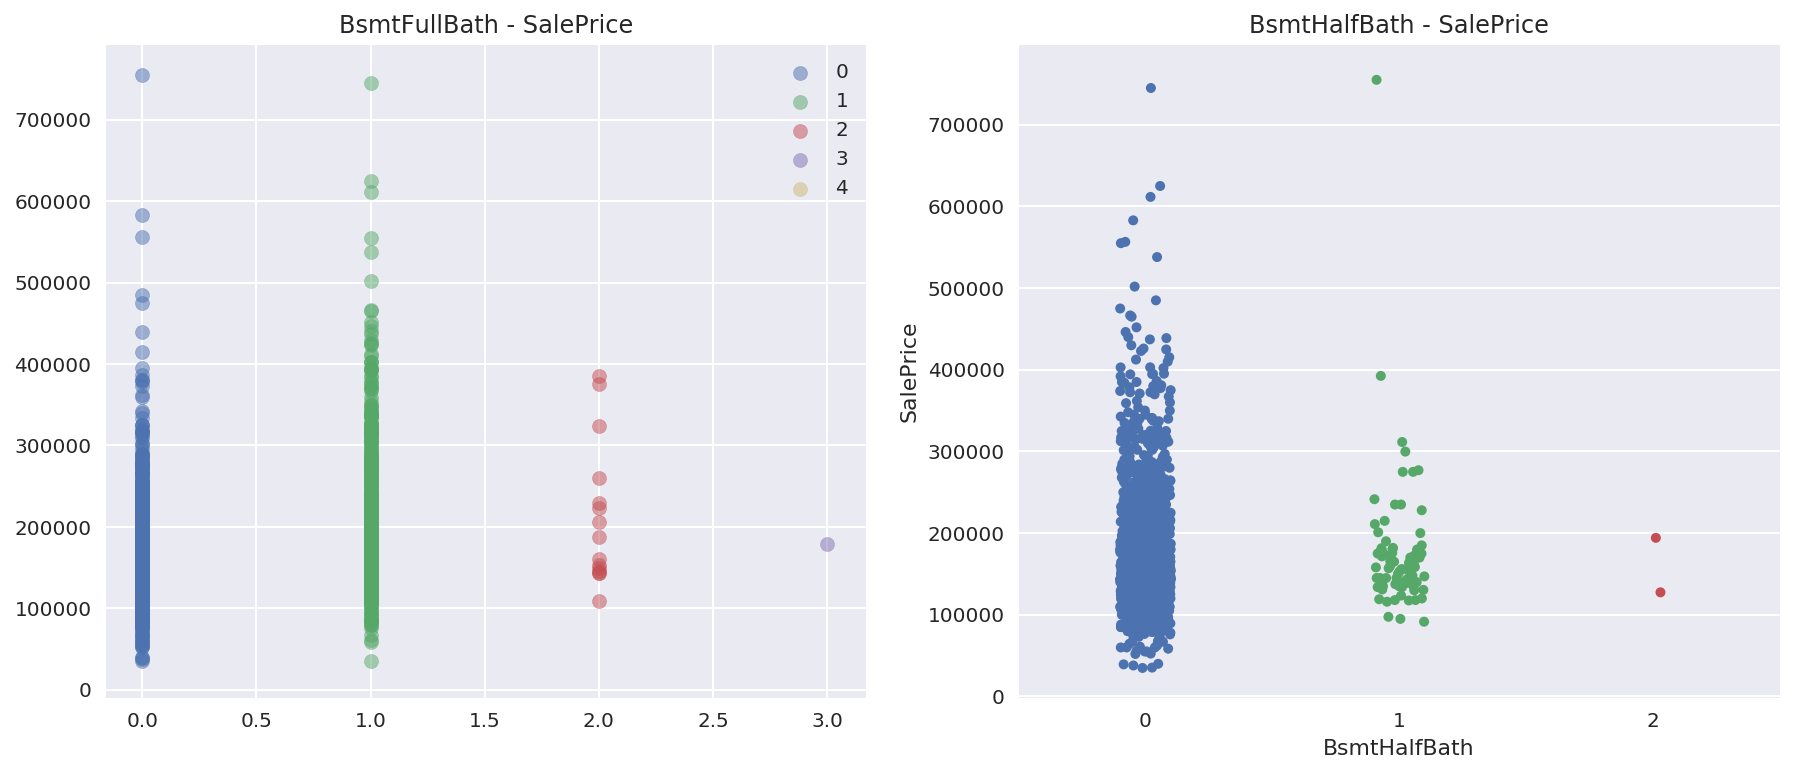

In [5]:
plt.figure(figsize=(15,6))

ax1 = plt.subplot(1,2,1)
for BSMT in range(0,5):
    index = train.BsmtFullBath == BSMT
    ax1.scatter(x = train.BsmtFullBath.loc[index], y = train.SalePrice.loc[index], data=train, label=BSMT, alpha='0.5')

ax1.legend()
ax1.set_title('BsmtFullBath - SalePrice')

ax2 = plt.subplot(1,2,2)
sns.stripplot(x = "BsmtHalfBath", y = "SalePrice", data=train,ax=ax2, jitter=True)
ax2.set_title('BsmtHalfBath - SalePrice')
ax2.legend()

# ax3 = plt.subplot(2,1,2)
# ax = sns.countplot(x="BsmtHalfBath", data=train,
#                     facecolor=(0, 0, 0, 0),
#                     linewidth=5,
#                     edgecolor=sns.color_palette("dark", 3))

# ax3 = plt.subplot(2,1,1)
# sns.countplot(x= "SalePrice", hue="BsmtHalfBath", data=train, ax=ax3)

# plt.show()



# plt.subplot(121)
# sns.boxplot(x = "BsmtFullBath", y = "SalePrice", data=train)

# plt.subplot(122)
# sns.boxplot(x = "BsmtHalfBath", y = "SalePrice", data=train)

BsmtFUllBATH의 경우에는 최소값에 영향을 주고 & HalfBath 의 경우에는 salprice에 큰 영향을 주지 않는 것으로 보인다.

In [ ]:
# test = np.log1p(train.BsmtFullBath)
# stats.probplot(test, plot=plt)
# stats.probplot(train["BsmtFullBath"], plot=plt)
# stats.probplot(train["BsmtHalfBath"], plot=plt)

In [ ]:
#stats.probplot(train["BsmtFullBath"], plot=plt)

#### 2-1-7 TotRm and Bedroom

In [ ]:
# plt.figure(figsize=(15,10))
# ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
# sns.stripplot(x = train['TotRmsAbvGrd'], y = train['SalePrice'], alpha = 0.5, jitter = True, ax=ax1)

plt.figure(figsize=(15,10))
ax1 = plt.subplot(2,1,1)
sns.stripplot(x='TotRmsAbvGrd', y='SalePrice', hue='TotRmsAbvGrd', data=train, jitter=True, alpha=0.6, ax=ax1)

ax2 = plt.subplot2grid((2,2), (1,0))
sns.countplot(x = "TotRmsAbvGrd", data=train , ax = ax2, order = train["TotRmsAbvGrd"].value_counts().index)

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = 'TotRmsAbvGrd', y = 'OverallQual', data = train, ax=ax3)
plt.show()

grid = sns.jointplot(x = "TotRmsAbvGrd", y = "SalePrice", data=train, kind="reg", size = 10)

# ax5 = plt.subplot(2,1,2)
# ax5.scatter(x = train['Fireplaces'], y = train['GrLivArea'], alpha = 0.5)
# plt.show()


In [ ]:
plt.figure(figsize=(15,6))

ax1 = plt.subplot(1,2,1)
for TotRmsAbvGrd in range(0,5):
    index = train.TotRmsAbvGrd == TotRmsAbvGrd
    sns.stripplot(x = train.BsmtFullBath, y = train.SalePrice, data=train,ax = ax1, label=TotRmsAbvGrd, alpha='0.5')

ax1.legend()
ax1.set_title('TotRmsAbvGrd - SalePrice')

ax2 = plt.subplot(1,2,2)
sns.stripplot(x = "BedroomAbvGr", y = "SalePrice", data=train,ax=ax2, jitter=True)
ax2.set_title('BedroomAbvGr - SalePrice')
ax2.legend()

grid = sns.jointplot(x = "BedroomAbvGr", y = "SalePrice", data=train, kind="reg", size = 10)


plt.show()

# plt.subplot(121)
# sns.boxplot(x = "TotRmsAbvGrd", y = "SalePrice", data=train)

# plt.subplot(122)
# sns.boxplot(x = "BedroomAbvGr", y = "SalePrice", data=train)

확실히 TotRmsAbvGrd 는 연관관계가 있는것으로 보임

In [ ]:
stats.probplot(train["TotRmsAbvGrd"], plot=plt)
stats.probplot(train["BedroomAbvGr"], plot=plt)

In [ ]:
train[['TotRmsAbvGrd', 'BedroomAbvGr']].hist(bins=80, figsize=(10,5))

Tot : 길게 하나 하고, 어떤 방이 여기에 포함되어있는지 확인필요

이런 데이터의 경우에는 확실히 한단계 데이터 조치가 필요할것으로 보임
이런 경우는 어떻게 해야하지?

Full Bath의 경우에는 영향이 있으나 HalfBath의 경우에는 영향이 미미한것으로 확인할 수 있음

### 2-2 Missing Data 처리

3가지 정도의 가설 
1. 미싱데이터 80% 이상의 데이터들을 제거했을때
2. 비어있는 값들의 처리를 0 or mean 값으로 한경우
3. one-hot encoding 했을때 

1. 변수값과 관련하여 saleprice 분포를 확인하고 나열 
2. categorical data 마다 더미 변수를 만드는것

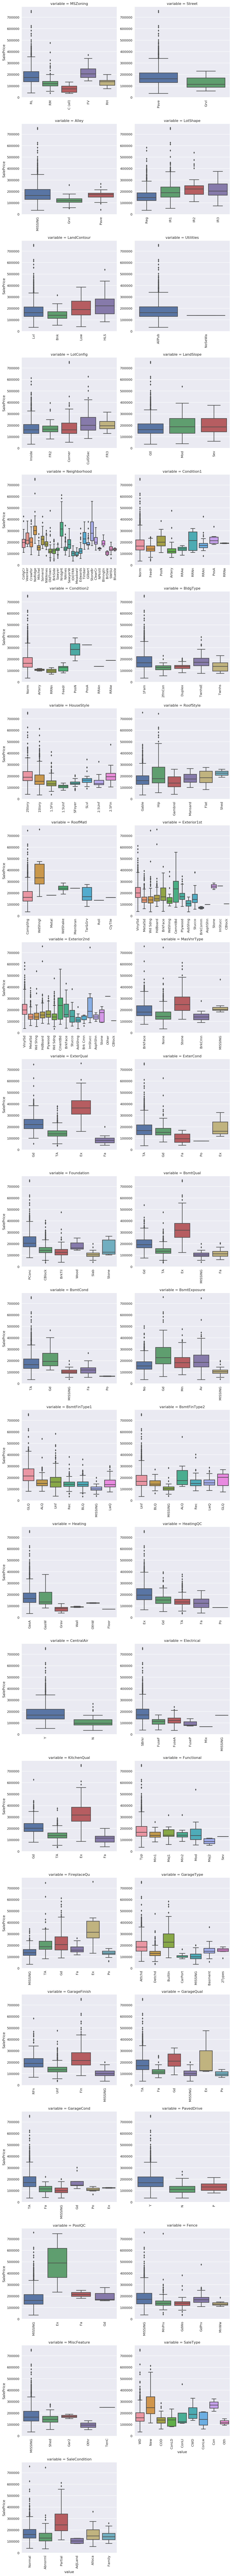

In [8]:
for c_f in categorical_features:
    train[c_f] = train[c_f].astype('category')
    if train[c_f].isnull().any():
        train[c_f] = train[c_f].cat.add_categories(['MISSING'])
        train[c_f] = train[c_f].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

일부 카테고리는 다른 것보다 SalePrice와 관련하여 더 다양한 영향을 주는것처럼 보인다.
이웃은 주택 가격에 큰 영향을 미치는 것으로 보인다.    
가장 영향을 많이 미치는건 partial 판매조건이고 부동산에 수영장이 있는것은 가격을 향상시키는
중요한 요인인것처럼 보인다.  
범주 값 사이의 차이점도 있습니다.  

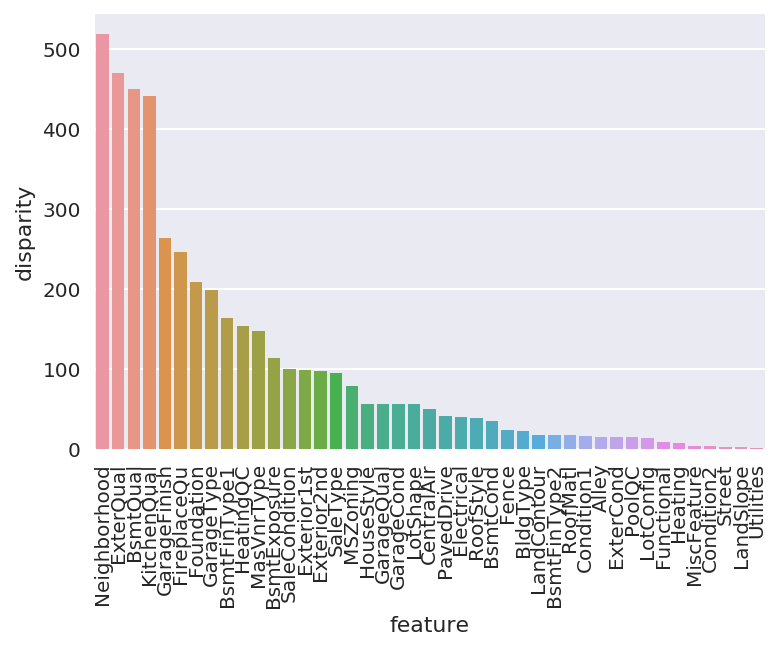

In [11]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = categorical_features
    pvals = []
    for c in categorical_features:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

다음은 SalePrice에 대한 범주 형 변수의 영향을 예측 한 plot
각 변수에 대해 SalePrices는 범주 값에 따라 별개의 집합으로 분할 후  
그런 다음 집합에 비슷한 분포가 있는지 ANOVA 테스트로 확인한다.  
pval 감소는 파티션의 다양성 증가에 대한 신호입니다.
변수가 사소한 영향을 미친다면 그룹화해서 

In [25]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
All_data = pd.concat((train, test)).reset_index(drop=True)
All_data.drop(['SalePrice'], axis=1, inplace=True)
print("All data size is {}".format(all_data.shape))

All data size is (2919, 80)


In [ ]:
total = all_data.isnull().sum().sort_values(ascending=False)
ratio = ((all_data.isnull().sum()/len(all_data))*100).sort_values(ascending=False)
missing_data = pd.concat([total, ratio], axis=1, keys=['Total', 'Ratio'])
missing_data[:20]

In [ ]:
f, ax = plt.subplots(figsize=(15,7))
plt.xticks(rotation='45')
sns.barplot(x=ratio.index, y=ratio)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing valurs', fontsize=15)
plt.title('Percent missing data by features', fontsize=15)

missing value 처리 1단계   
missing ration가 큰 값들을 drop 하거나 none 값으로 채워 주었을시 분기점

# 1-1)Missing value 제거시 

In [ ]:
# all_data.drop("PoolQC", axis = 1, inplace = True)
# all_data.drop("MiscFeature", axis = 1, inplace = True)
# all_data.drop("Alley", axis = 1, inplace = True)

# 1-2)Missig value 를 none 값으로 채울시

In [ ]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

# missing value 채우기 

In [ ]:
train.columns

# 2 - 1

In [ ]:
feats=["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for feat in feats:
    all_data[feat].fillna(0, inplace=True)

In [ ]:
# fill in with None
feats1 = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for feat in feats1:
    all_data[feat].fillna("None", inplace=True)

In [ ]:
# fill in with mode
feats2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for feat in feats2:
    All_data[feat].fillna(All_data[feat].mode()[0], inplace=True)

방법 2

노답 4형제 
[PoolQC, MiscFeature, Alley]


In [ ]:
#### PoolQC
if (All_data['PoolQC'].isnull().sum().sum() != 0):
    All_data['PoolQC'] = All_data['PoolQC'].fillna('NoPoolQC')

# 2 - 2

In [36]:
# LotFrontage 
All_data["LotFrontage"].fillna(0, inplace=True) 

# NA means no fence 로 생각하고 데이터 케어
All_data["Fence"].fillna("None", inplace=True)

# FireplaceQu  NA 값을 Fireplace 가 없는 것으로 생각하고 제어
All_data["FireplaceQu"].fillna("None", inplace=True)

#  GarageCond 
## NA garage 가 없다는 것을 의미
All_data["GarageCond"].fillna("None", inplace=True)

# GarageYrBlt
# 불명확  0 ? none? 사실상 아랫단에서 0으로 바꿔주기에 큰 문제는.. !!!!!!!!!!!!!!!!!!!!!!!!!!!
All_data["GarageYrBlt"].fillna(0, inplace=True)

# 이 아래 데이터와 함께 움직여야함 
# GarageArea
All_data["GarageArea"].fillna(0, inplace=True)

# GarageCars

# GarageFinish 
## NA garage 가 없다는 것을 의미
All_data["GarageFinish"].fillna("None", inplace=True)

# GarageQual 
## NA garage 가 없다는 것을 의미
All_data["GarageQual"].fillna("None", inplace=True)

# GarageType 
## NA garage 가 없다는 것을 의미
All_data["GarageType"].fillna("None", inplace=True)

# BsmtFinType2 
# na는 basement 가 없다는것을 의미
All_data["BsmtFinType2"].fillna("None", inplace=True)

# BsmtExposure
# na는 basement 가 없다는것을 의미
All_data["BsmtExposure"].fillna("None", inplace=True)

# BsmtQual
# na는 basement 가 없다는것을 의미
All_data["BsmtQual"].fillna("None", inplace=True)

# BsmtFinType1
# na는 basement 가 없다는것을 의미
All_data["BsmtFinType1"].fillna("None", inplace=True)

# BsmtCond:
# na는 basement 가 없다는것을 의미
All_data["BsmtCond"].fillna("None", inplace=True)

# MasVnrType:
# 말그대로 none 
All_data["MasVnrType"].fillna("None", inplace=True)

# MasVnrArea 
# 0에 가깝다는 것을 의미 
All_data["MasVnrArea"].fillna(0, inplace=True) 

### Electrical !!!
# 일단은 가장 많은값인 SKrkr을 넣어주었음
All_data["Electrical"].fillna("SBrkr", inplace=True) 
ㅁ
# BsmtHalfBath 
# 0에 가깝다는 것을 의미 
All_data["BsmtHalfBath"].fillna(0, inplace=True)

# BsmtFullBath
# 0에 가깝다는 것을 의미 
All_data["BsmtFullBath"].fillna(0, inplace=True)

# BsmtFinSF1 
# 0에 가깝다는 것을 의미 
All_data["BsmtFinSF1"].fillna(0, inplace=True)

# BsmtFinSF2 
# 0에 가깝다는 것을 의미 
All_data["BsmtFinSF2"].fillna(0, inplace=True)

# BsmtUnfSF 
# 0에 가깝다는 것을 의미 
All_data["BsmtUnfSF"].fillna(0, inplace=True)

# TotalBsmtSF
# 0에 가깝다는 것을 의미 
All_data["TotalBsmtSF"].fillna(0, inplace=True)

# GarageCars
# 0
All_data["GarageCars"].fillna(0, inplace=True)

## GarageArea 
# 0
#All_data["GarageArea"].fillna(0, inplace=True)

# Utilities 
# 
All_data["Utilities"].fillna(0, inplace=True)

# Functional
#
All_data["Functional"].fillna(0, inplace=True)

# BsmtCond
# KitchenQual 0? none?
All_data["KitchenQual"].fillna(0, inplace=True)

#MSZoning  !!!!!!!!!!!!!! 어떻게 처리해야할지
All_data["MSZoning"].fillna("", inplace=True)

#SaleType 
# 가장 빈도수가 많은 값을 넣어줌 
All_data["SaleType"].fillna("WD", inplace=True)

#Exterior 1 and 2 :
 # 가장 빈도수가 많은 값을 넣어줌 

All_data['Exterior1st'] = All_data['Exterior1st'].fillna(All_data['Exterior1st'].mode()[0])
All_data['Exterior2nd'] = All_data['Exterior2nd'].fillna(All_data['Exterior2nd'].mode()[0])

In [12]:
All_data.isnull().sum()[All_data.isnull().sum()>0]

NameError: name 'All_data' is not defined

Exterior1st        1  
Exterior2nd        1

#MSZoning  !!!!!!!!!!!!!! 어떻게 처리해야할지

#MSSubClass 데이터 처리 방안... 유사 근접?


# 3단계

In [ ]:
# 숫자로 된 카테고리 데이터들로 변경 

Convert_data = all_data.replace({"BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"None" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageFinish" : {"None" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [13]:
train.groupby(['Neighborhood'])[['SalePrice']].agg(['quantile'])

SalePrice
              quantile
Neighborhood          
Blmngtn       191000.0
Blueste       137500.0
BrDale        106000.0
BrkSide       124300.0
ClearCr       200250.0
CollgCr       197200.0
Crawfor       200624.0
Edwards       121750.0
Gilbert       181000.0
IDOTRR        103000.0
MeadowV        88000.0
Mitchel       153500.0
NAmes         140000.0
NPkVill       146000.0
NWAmes        182900.0
NoRidge       301500.0
NridgHt       315000.0
OldTown       119000.0
SWISU         139500.0
Sawyer        135000.0
SawyerW       179900.0
Somerst       225500.0
StoneBr       278000.0
Timber        228475.0
Veenker       218000.0

In [ ]:
# 4분위수를 기준으로 각각 데이터들을 0,1,2,3 으로 카테고리화 함.


Convert_data = Changed_data.replace({"Neighborhood" : {
"MeadowV" : 0,
"IDOTRR" : 0,
"BrDale" : 0,
"OldTown" : 0,
"Edwards" : 0,
"BrkSide" : 0,
"Sawyer" : 0,
"Blueste" : 1,
"SWISU" : 1,
"NAmes" : 1,
"NPkVill" : 1,
"Mitchel" : 1,
"SawyerW" : 1,
"Gilbert" : 2,
"NWAmes" : 2,
"Blmngtn" : 2,
"CollgCr" : 2,
"ClearCr" : 2,
"Crawfor" : 2,
"Veenker" : 3,
"Somerst" : 3,
"Timber" : 3,
"StoneBr" : 3,
"NoRidge" : 3,
"NridgHt" : 3}})

해결 못한것 : 

In [ ]:
# 카테고리 데이터 수치화 
Changed_data = Changed_data.replace({"MSSubClass" : {},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                  7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                                    })


In [14]:
train.groupby(['MSSubClass'])[['SalePrice']].agg(['mean','median','count'])

SalePrice              
                     mean  median count
MSSubClass                             
20          185224.811567  159250   536
30           95829.724638   99900    69
40          156125.000000  142500     4
45          108591.666667  107500    12
50          143302.972222  132000   144
60          239948.501672  215200   299
70          166772.416667  156000    60
75          192437.500000  163500    16
80          169736.551724  166500    58
85          147810.000000  140750    20
90          133541.076923  135980    52
120         200779.080460  192000    87
160         138647.380952  146000    63
180         102300.000000   88500    10
190         129613.333333  128250    30

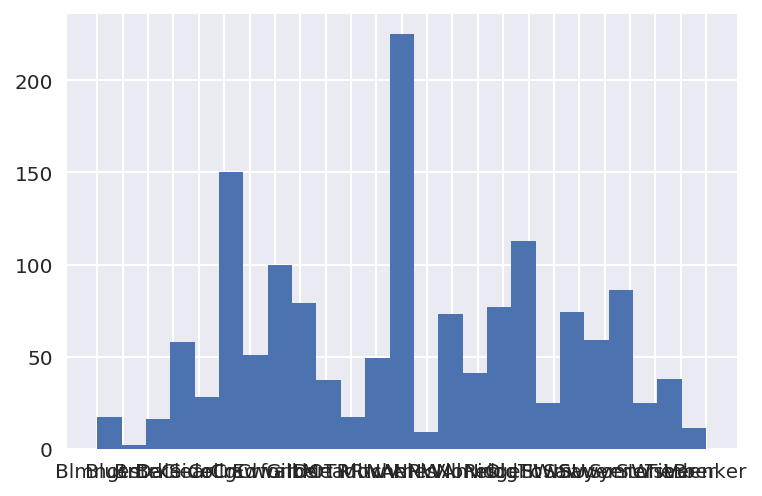

In [50]:
plt.hist(train.Neighborhood, bins=25)
plt.show()

# 2 - 3 
작업중

방법3 비슷한데이터들은 비슷한 처리방법으로 
비어있는 값들에 0이나 None도 넣지만 mean값을 넣는방법 

In [ ]:
for feat in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[feat] = all_data[feat].fillna('None')

for feat in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[feat] = all_data[feat].fillna(0)

for feat in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[feat] = all_data[col].fillna(0)

# category 데이터 이므로 none 값으로 채워준다. 
for feat in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[feat] = all_data[feat].fillna('None')

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data['MSZoning']= all_data["MSZoning"].fillna(all_data['MSZoning'].mode()[0])

# 이용하기 애매해서 여기선 drop 함 
all_data = all_data.drop('Utilities', axis=1)

all_data['Functional']= all_data["Functional"].fillna("Typ")

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


all_data["Electrical"] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data["KitchenQual"]=all_data["KitchenQual"].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

missing data 확인하는곳

In [15]:
All_data.isnull().sum()[All_data.isnull().sum()>0]

NameError: name 'All_data' is not defined

미씽 데이터 3-8일 수업으로 응용해본것

In [ ]:
#새로운 특징 추가

All_data['Total_Home_Quality'] = All_data['OverallQual'] + All_data['OverallCond']
All_data['Total_Basement_Quality'] = All_data['BsmtQual'] + All_data['BsmtCond']
All_data['Total_Basement_FinshedSqFt'] = All_data['BsmtFinSF1'] + All_data['BsmtFinSF2']
All_data['Total_Exterior_Quality'] = All_data['ExterQual'] + All_data['ExterCond']
All_data['Total_Garage_Quality'] = All_data['GarageCond'] + All_data['GarageQual'] + All_data['GarageFinish']
All_data['Total_Basement_FinshType'] = All_data['BsmtFinType1'] + All_data['BsmtFinType2']
All_data['Total_Garage_Quality'] = All_data['GarageCond'] + All_data['GarageQual'] + All_data['GarageFinish']
All_data['Total_Basement_FinshType'] = All_data['BsmtFinType1'] + All_data['BsmtFinType2']
All_data['Total_Bathrooms'] = All_data['BsmtFullBath'] + (All_data['BsmtHalfBath'] * 0.5) + All_data['FullBath'] + (All_data['HalfBath'] * 0.5)
All_data['Total_Land_Quality'] = All_data['LandSlope'] + All_data['LotShape']


#개개인 특성은 드랍

All_data.drop("OverallQual", axis = 1, inplace = True)
All_data.drop("OverallCond", axis = 1, inplace = True)
All_data.drop("BsmtQual", axis = 1, inplace = True)
All_data.drop("BsmtCond", axis = 1, inplace = True)
All_data.drop("BsmtFinSF1", axis = 1, inplace = True)
All_data.drop("BsmtFinSF2", axis = 1, inplace = True)
All_data.drop("ExterQual", axis = 1, inplace = True)
All_data.drop("ExterCond", axis = 1, inplace = True)
All_data.drop("GarageCond", axis = 1, inplace = True)
All_data.drop("GarageQual", axis = 1, inplace = True)
All_data.drop("GarageFinish", axis = 1, inplace = True)
All_data.drop("BsmtFinType1", axis = 1, inplace = True)
All_data.drop("BsmtFinType2", axis = 1, inplace = True)
All_data.drop("BsmtFullBath", axis = 1, inplace = True)
All_data.drop("BsmtHalfBath", axis = 1, inplace = True)
All_data.drop("FullBath", axis = 1, inplace = True)
All_data.drop("HalfBath", axis = 1, inplace = True)
All_data.drop("LandSlope", axis = 1, inplace = True)
All_data.drop("LotShape", axis = 1, inplace = True)

# LandContour LandSlope 안에 포함되어 있기때문에 제-거
All_data.drop("LandContour", axis = 1, inplace = True)


### 2-3 아웃라이어 제거

In [ ]:
y_train

In [ ]:
# 데이터 븐류 
train = all_data[:ntrain]
test = all_data[ntrain:]

In [ ]:
x_train_x0 = train.copy()

In [ ]:
x_train = sm.add_constant(x_train_x0)
x_train = pd.get_dummies(x_train)

In [ ]:
x_train.tail()

In [ ]:
x_train = pd.DataFrame(x_train.astype(float))
y_train = pd.DataFrame(y_train.astype(float))

x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
model = sm.OLS(pd.DataFrame(y_train),pd.DataFrame(x_train))
result = model.fit()
print(result.summary())

In [ ]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(15,6))
plt.stem(hat)
plt.show()

In [ ]:
hat.sum()

In [ ]:
plt.figure(figsize=(15, 6))
plt.stem(result.resid_pearson)
plt.show()

In [ ]:
g = sm.graphics.plot_leverage_resid2(result)
g.set_size_inches(15,5)
plt.show()

In [ ]:
idx = result.resid_pearson < 2
x_train = x_train[idx]
y_train = y_train[idx]

### Encoding

In [ ]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
categoric_encoded = []
for q in categoric_features:  
    encode(train, q)
    categoric_encoded.append(q+'_E')
print(categoric_encoded)

In [ ]:
corrmat = train.corr()
corrmat

In [ ]:
import missingno as msno

missingValueColumns = train.columns[train.isnull().any()].tolist()
msno.heatmap(train[missingValueColumns],figsize=(20,20))

In [ ]:
cols = corrmat.nlargest(30, 'SalePrice')['SalePrice'].index
cols

In [ ]:
f, ax = plt.subplots(figsize = (15,9))
sns.heatmap(corrmat, vmax = 1, square=True)

In [ ]:
cols = corrmat.nlargest(20, 'SalePrice')['SalePrice'].index 
cols

In [ ]:
cm = np.corrcoef(train[cols].values.T)

plt.figure(figsize=(20,20))
sns.set(font_scale=1.25)
hm=sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',\
              annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.plot()

In [ ]:
for c in cols:
    data = pd.concat([train['SalePrice'], train[c]],axis=1)
    data.plot.scatter(x=c, y='SalePrice',ylim=(0,800000));

In [ ]:
# all_data[(all_data['GarageCars']==4) & (all_data['SalePrice'] < 300000)]

In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [ ]:
from scipy import stats
from scipy.stats import norm, skew

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(30)

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])